In [10]:
import os
import pydicom
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('RSNA_breast_cancer_data.csv')
df.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,implant,machine_id,difficult_negative_case,image_path
0,1,1014,629904228,L,MLO,76.0,0,0,0,0,49,False,IMG\629904228.dcm
1,1,1014,669597068,L,CC,76.0,0,0,0,0,49,False,IMG\669597068.dcm
2,1,1014,229558076,R,MLO,76.0,0,0,0,0,49,False,IMG\229558076.dcm
3,1,1014,1173679750,R,CC,76.0,0,0,0,0,49,False,IMG\1173679750.dcm
4,1,10208,638273415,L,MLO,56.0,0,0,0,0,49,True,IMG\638273415.dcm


In [6]:
df.columns

Index(['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age',
       'cancer', 'biopsy', 'invasive', 'implant', 'machine_id',
       'difficult_negative_case'],
      dtype='object')

preparing data_for_training to include wit features extracted using CNN

In [16]:
# drop irrelevant columns
df.drop(columns = ['site_id', 'patient_id', 'implant', 'machine_id', 'image_path', 'image_id'], inplace = True)
df.head()

,laterality,view,age,cancer,biopsy,invasive,difficult_negative_case
0,L,MLO,76.0,0,0,0,False
1,L,CC,76.0,0,0,0,False
2,R,MLO,76.0,0,0,0,False
3,R,CC,76.0,0,0,0,False
4,L,MLO,56.0,0,0,0,True


In [18]:
df['view'].value_counts()

view
MLO    1217
CC     1157
Name: count, dtype: int64

In [19]:
df['laterality'].value_counts()

laterality
L    1215
R    1159
Name: count, dtype: int64

In [17]:
df.shape

(2374, 7)

In [67]:
# This code converts dicom into jpeg
dicom_path = "IMG/106495931.dcm"
jpeg_path = "106495931.jpg"
dcmtk_path = r"C:\Users\abhil.LAPTOP-UDIMD39P\Downloads\dcmtk-3.6.9-win64-dynamic\dcmtk-3.6.9-win64-dynamic\bin\dcmj2pnm.exe"  # Use the correct path
subprocess.run([dcmtk_path, dicom_path, jpeg_path])

CompletedProcess(args=['C:\\Users\\abhil.LAPTOP-UDIMD39P\\Downloads\\dcmtk-3.6.9-win64-dynamic\\dcmtk-3.6.9-win64-dynamic\\bin\\dcmj2pnm.exe', 'IMG/106495931.dcm', '106495931.jpg'], returncode=1)

In [20]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# LE only for binary columns
for col in ['laterality', 'view']:
    df[col] = le.fit_transform(df[col])

**L = 0**
**R = 1**

**CC = 0**
**MLO = 1**

In [21]:
df.head()

,laterality,view,age,cancer,biopsy,invasive,difficult_negative_case
0,0,1,76.0,0,0,0,False
1,0,0,76.0,0,0,0,False
2,1,1,76.0,0,0,0,False
3,1,0,76.0,0,0,0,False
4,0,1,56.0,0,0,0,True


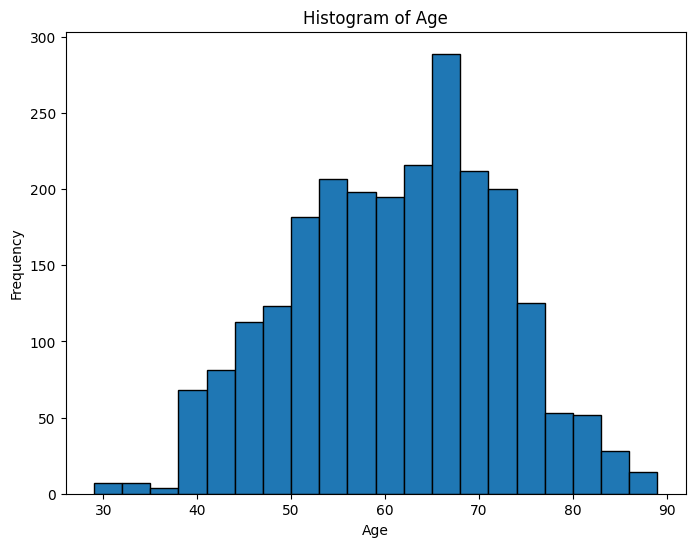

In [29]:
import matplotlib.pyplot as plt

# Plotting the histogram of the 'age'
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [32]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality on the 'age' column
stat, p_value = shapiro(df['age'])

# Output the test statistic and p-value
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}")

Shapiro-Wilk Test Statistic: 0.991280765232683
P-value: 8.96742336230274e-11


age distribution is likely not normal.

In [35]:
# normalising age column
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])

In [40]:
df.head()

,laterality,view,age,cancer,biopsy,invasive,difficult_negative_case
0,0,1,1.387848,0,0,0,False
1,0,0,1.387848,0,0,0,False
2,1,1,1.387848,0,0,0,False
3,1,0,1.387848,0,0,0,False
4,0,1,-0.427392,0,0,0,True


In [42]:
meta_data = df.copy(deep = True)
meta_data.to_csv('meta_data.csv', index = False)